In [1]:
import pandas as pd
data = pd.read_csv('datawash.csv', index_col=0)

In [2]:
print(data.shape)
data['write_time'] = pd.to_datetime(data['write_time'])
# 查看每列数据类型
data.dtypes

(51168, 9)


abstract                object
comment                  int64
favorites                int64
name                    object
title                   object
url                     object
write_time      datetime64[ns]
title_length             int64
year                     int64
dtype: object

In [3]:
# 对数值型变量进行统计分析
data.describe()

,comment,favorites,title_length,year
count,51168.000000,51168.000000,51168.000000,51168.000000
mean,10.842851,34.833744,22.656465,2015.304116
std,23.874707,49.250719,9.537370,1.954846
min,0.000000,0.000000,1.000000,2012.000000
25%,3.000000,9.000000,17.000000,2014.000000
50%,6.000000,19.000000,22.000000,2015.000000
75%,12.000000,41.000000,28.000000,2017.000000
max,2376.000000,1119.000000,224.000000,2018.000000


In [4]:
# 对非数值型变量进行统计分析
data['name'].describe()

count     51168
unique     5050
top          虎嗅
freq      10546
Name: name, dtype: object

In [5]:
data['write_time'].describe()

count                   51168
unique                   2440
top       2014-07-10 00:00:00
freq                      274
first     2012-04-03 00:00:00
last      2018-12-09 00:00:00
Name: write_time, dtype: object

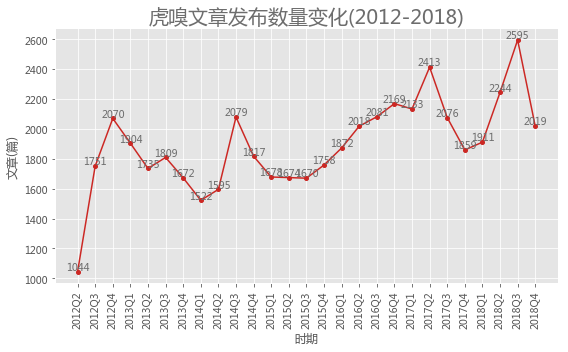

In [7]:
# 不同时期发布文章数量变化图
import numpy as np
import matplotlib.pyplot as plt
# from pylab import *

# mpl.rcParams['font.sans-serif'] = ['SimHei']
# plt.rcParams['axes.unicode_minus']=False

plt.style.use('ggplot')
fig= plt.figure(figsize=(8,5))
# fig,ax = plt.subplots(figsize=(16,9))
ax1 = fig.add_subplot(1,1,1)
colors = '#6D6D6D'  #设置标题颜色为灰色
color_line = '#CC2824'
# colors = '#242424'  #设置标题颜色为灰色
fontsize_title = 20
fontsize_text = 10

def date_analysis(data):
    data.set_index(data['write_time'], inplace=True)
    data = data.resample('Q').count()['name']
    data = data.to_period('Q')
    
    x = np.arange(0, len(data), 1)
    ax1.plot(x, data.values,
            color = color_line,
            marker = 'o', markersize = 4
            )
    ax1.set_xticks(x)
    ax1.set_xticklabels(data.index)
    plt.xticks(rotation=90)
    
    for x,y in zip(x, data.values):
        plt.text(x, y+10, '%.0f' %y, ha='center', color=colors, fontsize=fontsize_text)
        
    plt.title(u'虎嗅文章发布数量变化(2012-2018)', color=colors, fontsize=fontsize_title)
    plt.xlabel(u'时期')
    plt.ylabel('文章(篇)')
    plt.tight_layout() # 自动控制空白边缘
    plt.savefig('虎嗅网文章数量发布变化.png', dpi=200)
    plt.show()

date_analysis(data)

In [ ]:
# 文章收藏量 TOP10
